1. 基础
* 1.1 梯度下降使用同一固定不变的超参数引发的问题：
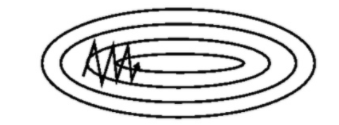
* 1.2. 动量法:
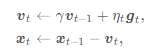
其中Vt是当前速度，γ是动量参数，是一个小于 1的正数，η是学习率
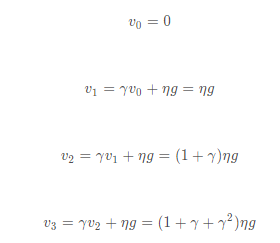

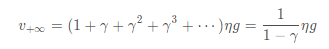

* 1.3. 有效样本权重
2. 实际实验
* 2.1. 从零开始实现
* 2.2. 简洁实现
3. 理论分析
* 3.1. 二次凸函数
* 3.2. 标量函数

epoch 20, x1: -0.943467, x2: -0.000073


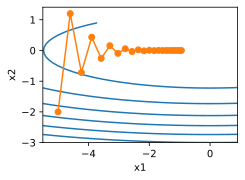

In [5]:
import torch
import dltools

eta = 0.4
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

dltools.show_trace_2d(f_2d, dltools.train_2d(gd_2d))

epoch 20, x1: -0.387814, x2: -1673.365109


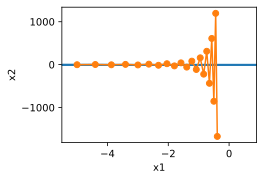

In [6]:
eta = 0.6
dltools.show_trace_2d(f_2d, dltools.train_2d(gd_2d))

epoch 20, x1: 0.007188, x2: 0.002553


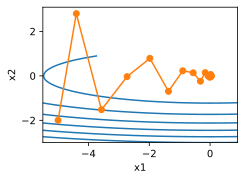

In [7]:
# 基于指数加权平均的思路--动量法
def momentum_2d(x1, x2, v1, v2):
    v1 = beta * v1 + 0.2 * x1
    v2 = beta * v2 + 4 * x2
    return x1 - eta * v1, x2 - eta * v2, v1, v2

eta, beta = 0.6, 0.5
dltools.show_trace_2d(f_2d, dltools.train_2d(momentum_2d))

epoch 20, x1: -0.126340, x2: -0.186632


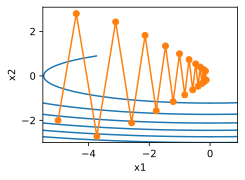

In [11]:
eta, beta = 0.6, 0.25
dltools.show_trace_2d(f_2d, dltools.train_2d(momentum_2d))

In [12]:
def init_momentum_states(feature_dim):
    v_w = torch.zeros((feature_dim, 1))
    v_b = torch.zeros(1)
    return (v_w, v_b)

def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        with torch.no_grad():
            v[:] = hyperparams['momentum'] * v + p.grad
            p[:] -= hyperparams['lr'] * v
        p.grad.data.zero_()

loss: 0.243, 0.037 sec/epoch


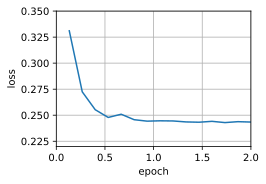

In [21]:
def train_momentum(lr, momentum, num_epochs=2):
    dltools.train_ch11(sgd_momentum, init_momentum_states(feature_dim),{'lr': lr, 'momentum': momentum}, data_iter,feature_dim, num_epochs)

data_iter, feature_dim = dltools.get_data_ch11(batch_size=10) # airfoil数据集
train_momentum(0.02, 0.5)

loss: 0.257, 0.038 sec/epoch


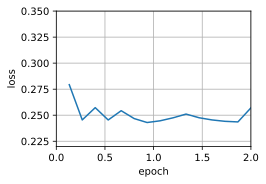

In [22]:
train_momentum(0.01, 0.9)

loss: 0.245, 0.035 sec/epoch


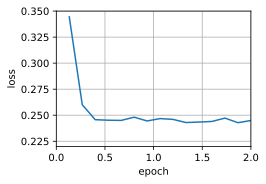

In [23]:
train_momentum(0.005, 0.9)

loss: 0.242, 0.039 sec/epoch


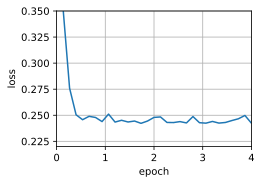

In [24]:
# 简洁实现
trainer = torch.optim.SGD
dltools.train_concise_ch11(trainer, {'lr': 0.005, 'momentum': 0.9}, data_iter)

In [18]:
torch.arange(40).detach().numpy()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int64)

8